# Lab 3: 1D Finite Differences

## Thomas Algorithm 

### Code Deliverable 

In [1]:
#import external modules 
import numpy as np

def thomas_solver(a, b, c, d):
    
    """
    The Thomas Algorithm is a simplified form of Gaussian elimination that 
    can be used to solve tridiagonal systems of equations.
    
    Input:
        a, b, c, d - numpy vectors that make up tridiagonal matrix and solution d 
    Output: 
        x - solution numpy vector
    """
    
    #initialize number of equations
    #this will be the length of vector d 
    n = len(d)
    
    #make a copy of each array 
    #can use the map function to map an array function to each variable 
    aa, bb, cc, dd = (x.astype(float) for x in (a, b, c, d))
    
    #loop for n iterations 
    for i in range(1, n):
        
        #apply the Thomas Algorithm 
        m = aa[i - 1] / bb[i - 1]
        bb[i] = bb[i] - m * cc[i - 1]
        dd[i] = dd[i] - m * dd[i - 1]
        
    #assign solution x to main diagonal b 
    x = bb
    x[-1] = dd[-1] / bb[-1]
    
    for i in range(n - 2, -1, -1):
        x[i] = (dd[i] - cc[i] * x[i + 1]) / bb[i]
        
    #return solution
    return x 

### Thomas Algorithm Test

In [2]:
#initialize arrays a b c and d
a = np.full([9], -1)
b = np.full([10], 3)
c = np.full([9], -1)
d = np.array([2,1,1,1,1,1,1,1,1,2])

#call thomas_solver function with arrays 
result = thomas_solver(a, b, c, d)
print(result)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
#compare against thomas solver
A = np.array([[3, -1, 0, 0, 0, 0, 0, 0, 0, 0],
             [-1, 3, -1, 0, 0, 0, 0, 0, 0, 0],
             [0, -1, 3, -1, 0, 0, 0, 0, 0, 0],
             [0, 0, -1, 3, -1, 0, 0, 0, 0, 0],
             [0, 0, 0, -1, 3, -1, 0, 0, 0, 0],
             [0, 0, 0, 0, -1, 3, -1, 0, 0, 0],
             [0, 0, 0, 0, 0, -1, 3, -1, 0, 0],
             [0, 0, 0, 0, 0, 0, -1, 3, -1, 0],
             [0, 0, 0, 0, 0, 0, 0, -1, 3, -1],
             [0, 0, 0, 0, 0, 0, 0, 0, -1, 3]])

d = np.array([2,1,1,1,1,1,1,1,1,2])
print(np.linalg.solve(A,d))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Finite Differences

### Code Deliverable

In [37]:
#import external modules
from scipy import sparse

def finite_difference_sparse(f, a, b, ua, ub, N):
    
    """
    This function provides the approximate solution given the derivative of a function (f),
    the bounded x values (a, b), the initial boundary conditions (ua, ub) and the number of approx (N)
    
    Input:
        f - lambda function that is the derivative you are trying to approximate 
        a - starting x value 
        b - ending x value 
        ua - starting boundary value condition 
        ub - ending boundary value condition 
        N - number of iterations to approx
    Output:
        U_backslash - approximations using python backslash operator 
        U_thomas - approximations using thomas_solver function
        x - interior discretization points 
    """
    
    #split the domian [a,b] into N+1 equally spaced nodes 
    #x = a:b:h with h  = (b-a)/N+1
    h = (b - a) / (N + 1)

    #compute grid points 
    x = np.arange(a, b, h)

    #compute right hand side and set boundary conditions
    f = f(x)*(-h**2)
    f[0], f[-1] = f[0] - ua, f[-1] - ub
    
    #define vectors for main diagonal and off diagonals 
    main_diag = -2*np.ones((N+1, 1)).ravel()
    off_diag = 1*np.ones((N, 1)).ravel()

    #create sparse matrix 
    diagonals = [main_diag, off_diag, off_diag]
    A = sparse.diags(diagonals, [0,-1,1], shape=(N+1,N+1)).toarray()
    
    #solve matrix system using backslash and thomas algorithm 
    U_backslash = np.linalg.solve(A, f)
    U_thomas = thomas_solver(off_diag, main_diag, off_diag, f)
    
    #rreturn approximations and interior points 
    return U_backslash, U_thomas, x

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotApprox(xf, x, UB, UT, exactF):
    
    """
    This function plots the approximate solutions 
    versus the exact solution. 
    
    Input:
        xf - vector of interior points for exact solution 
        x - vector of interior points for approximate solutions 
        UB - approximation for the backslash opperator 
        UT - approximation for the thomas algorithm function
        exactF - lambda function that provides the exact solution
    Output:
        plot showing the approximate vs exact solution 
    """
    
    #plot U_thomas, U_backslash vs x against the exact 
    #solution at each x  
    plt.plot(xf, exactF(xf), label='Exact')
    plt.plot(x, UB, 'o', label='Backslash')
    plt.plot(x, UT, 'x', label='Thomas')
    plt.title('Approximations vs Exact')
    plt.legend()
    plt.show()

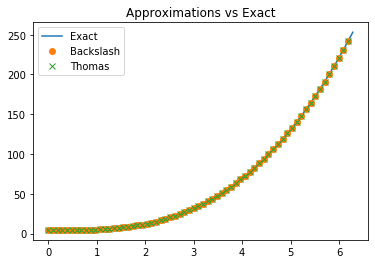

In [47]:
#initial conditions 
N = 64
a = 0
b = np.pi * 2
ua = 5
ub = 8 * np.pi**3 + 5

#Define mesh and lambda functions for 
#approximate and exact 
xf = np.linspace(a, b, N)
exact = lambda x: x**3 - np.sin(x) + 5
func = lambda x: -6*x - np.sin(x)

#call finite difference function 
UB, UT, x = finite_difference_sparse(func, a, b, ua, ub, N)

#plot approximations vs exact
plotApprox(xf, x, UB, UT, exact)

### Convergence study